# <div style = 'background-color:gray'> <center>Data Science en el Sector Bancario: Préstamos Personales</div>
---

#### Análisis de regresión aplicado a un conjunto de datos obtenidos de Kaggle, los cuales provienen de un web scraping realizado a un sitio argentino de clasificados. Los datos incluyen diversas características de automóviles correspondientes a enero de 2023. El objetivo del estudio es predecir el precio de un automóvil determinado en función de sus características.

Como se componen los datos

- money: the number of prices
- brand: the brand of the car
- model: the model of the car
- year: the year of the car
- color: the color of the car
- fuel_type: the fuel type of the car
- door: the door of the car
- gear: the gear type of the car
- motor: the motor type of the car
- body_type: the body type of the car
- kilometers: the kilometer of the car
- currency: the currency of the price of car

## <div style = 'background-color:black'> <center><font color='white'>① Preparación y limpieza de los datos </font></div>
Se parte con la preparación del conjunto de datos para el modelado para garantizar que la información sea coherente, completa y utilizable. Se incluyen tareas:

- Tratamiento de valores faltantes.
- Codificación de variables categóricas.
- Escalado o normalización de variables numéricas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # Importamos librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('argentina_cars.csv')
df.head(3)

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [3]:
headers = ["Precio", "Marca", "Modelo", "Año", "Color", "Combustible", "Puertas", "Transmision", "Motor", "Carroceria", "Km", "Moneda"]
df.columns = headers

In [4]:
df.head()

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Precio       510 non-null    int64  
 1   Marca        510 non-null    object 
 2   Modelo       510 non-null    object 
 3   Año          510 non-null    int64  
 4   Color        499 non-null    object 
 5   Combustible  510 non-null    object 
 6   Puertas      510 non-null    float64
 7   Transmision  509 non-null    object 
 8   Motor        499 non-null    object 
 9   Carroceria   509 non-null    object 
 10  Km           510 non-null    int64  
 11  Moneda       510 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 47.9+ KB


In [6]:
df.isnull().sum() # Para ver cuantos datos faltan y determinar en que columna estan.

Precio          0
Marca           0
Modelo          0
Año             0
Color          11
Combustible     0
Puertas         0
Transmision     1
Motor          11
Carroceria      1
Km              0
Moneda          0
dtype: int64

In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns].head(24))
# Con esta sentencia veo que datos son los que estan nulos (NAN), como son pocos en realidad le pido que me muestre
# los 24 valores asi analizo y veo que hacer si rellenar o borrar los datos faltantes.

           Color Transmision         Motor   Carroceria
0       Plateado  Automática           NaN          SUV
3    Gris oscuro  Automática           NaN          SUV
12      Plateado      Manual           NaN        Sedán
14         Negro  Automática           NaN    Hatchback
16          Gris  Automática           NaN          SUV
24         Negro      Manual           NaN    Hatchback
31         Negro      Manual           NaN      Pick-Up
34          Rojo      Manual           NaN    Hatchback
55          Gris      Manual           NaN        Coupé
56        Blanco  Automática           NaN        Sedán
208          NaN      Manual           4.4          SUV
211        Negro         NaN  2.8tdi 223cv      Pick-Up
231          NaN  Automática           1.8        Sedán
256          NaN      Manual           2.0        Sedán
278         Rojo      Manual           NaN          NaN
290          NaN      Manual           1.6        Sedán
295          NaN      Manual           1.4    Ha

In [8]:
# Hay muchos valores nulos, para no optar por borrarlos del dataset, elijo hacer un rellenado manual segun lo que es mas
# habitual en cada caracteristica.

df['Color'] = df['Color'].fillna("Gris") # En este caso lleno con el color mas comun.
df['Transmision'] = df['Transmision'].fillna("Manual") # En este caso lleno con el tipo de transmisión mas común.
df['Motor'] = df['Motor'].fillna(1.6) # Aqui relleno con el tipo de motor más vendido o usado
df['Carroceria'] = df['Carroceria'].fillna("Sedan")

In [9]:
df.isnull().sum()
# Vuelvo a pasar esta sentencia para verificar que ya no hay valores NAN (Not A Number)

Precio         0
Marca          0
Modelo         0
Año            0
Color          0
Combustible    0
Puertas        0
Transmision    0
Motor          0
Carroceria     0
Km             0
Moneda         0
dtype: int64

In [10]:
df.sample(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
127,2700000,Renault,Sandero,2018,Negro,Nafta,5.0,Manual,1.6,Hatchback,44000,pesos
173,3689900,Volkswagen,Polo,2017,Dorado,Nafta,4.0,Automática,1.6,Hatchback,45000,pesos
358,11195000,Volkswagen,Golf,2019,Blanco,Nafta,5.0,Automática,2.0,Hatchback,58000,pesos


## <div style = 'background-color:black'> <center><font color='white'>② Analisis exploratorio de los datos (EDA) </font></div>
Se examinara la estructura del dataset para ver las variables disponibles.  
En esta etapa se buscara:
- Conocer la cantidad de registros y variables.  
- Identificar valores nulos o duplicados.  
- Revisar tipos de datos.  
- Obtener estadísticas descriptivas básicas.  
- Visualizar relaciones entre las variables mediante gráficos.

In [11]:
df.Marca.value_counts()

Volkswagen       88
Ford             57
Chevrolet        51
Peugeot          49
Toyota           47
Renault          45
Citroën          32
Fiat             25
Jeep             20
Honda            18
Mercedes-Benz    14
BMW              13
Hyundai           9
Nissan            8
Audi              8
RAM               6
Dodge             4
Kia               3
Volvo             2
DS                2
Mitsubishi        2
Mini              2
Porsche           1
Chery             1
Suzuki            1
Subaru            1
Baic              1
Name: Marca, dtype: int64

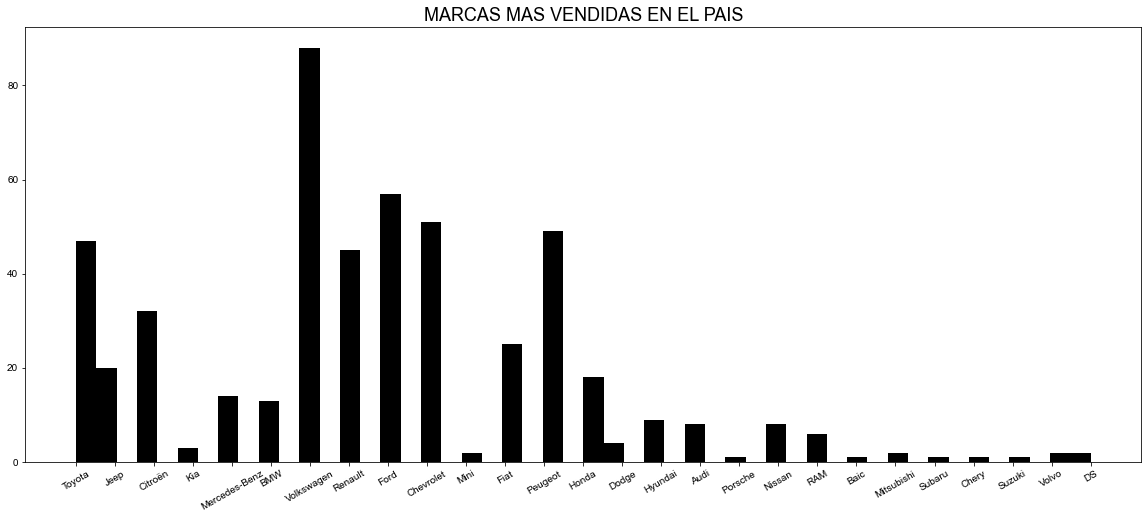

<Figure size 576x396 with 0 Axes>

In [12]:
df['Marca'].hist(bins=50, color='black') # Vemos graficamente su distribución
plt.title('MARCAS MAS VENDIDAS EN EL PAIS', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 8)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [13]:
df.Combustible.value_counts()

Nafta            416
Diésel            72
Nafta/GNC         19
Híbrido/Nafta      3
Name: Combustible, dtype: int64

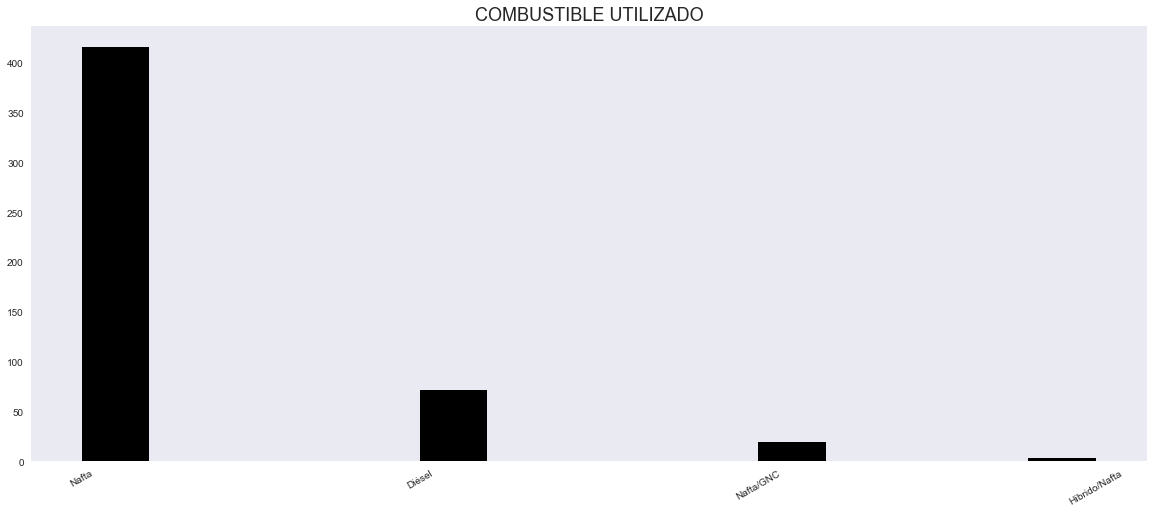

<Figure size 576x396 with 0 Axes>

In [14]:
df['Combustible'].hist(bins=15, color='black') # Vemos graficamente su distribución
plt.title('COMBUSTIBLE UTILIZADO', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 8)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [15]:
df.Carroceria.value_counts()

Hatchback      184
SUV            130
Sedán           98
Pick-Up         55
Monovolumen     18
Coupé           11
Furgón           8
Rural            3
Minivan          1
Sedan            1
Crossover        1
Name: Carroceria, dtype: int64

In [16]:
# En este caso hay 3 tipos de carroceria que voy a eliminar y agregar en otras mas representativas.
df.Carroceria = df.Carroceria.replace(["Sedan"], "Sedán")
df.Carroceria = df.Carroceria.replace(["Minivan", "Crossover"], "SUV")

In [17]:
# Vuelvo para ver como quedan los valores de esa columna.
df.Carroceria.value_counts()

Hatchback      184
SUV            132
Sedán           99
Pick-Up         55
Monovolumen     18
Coupé           11
Furgón           8
Rural            3
Name: Carroceria, dtype: int64

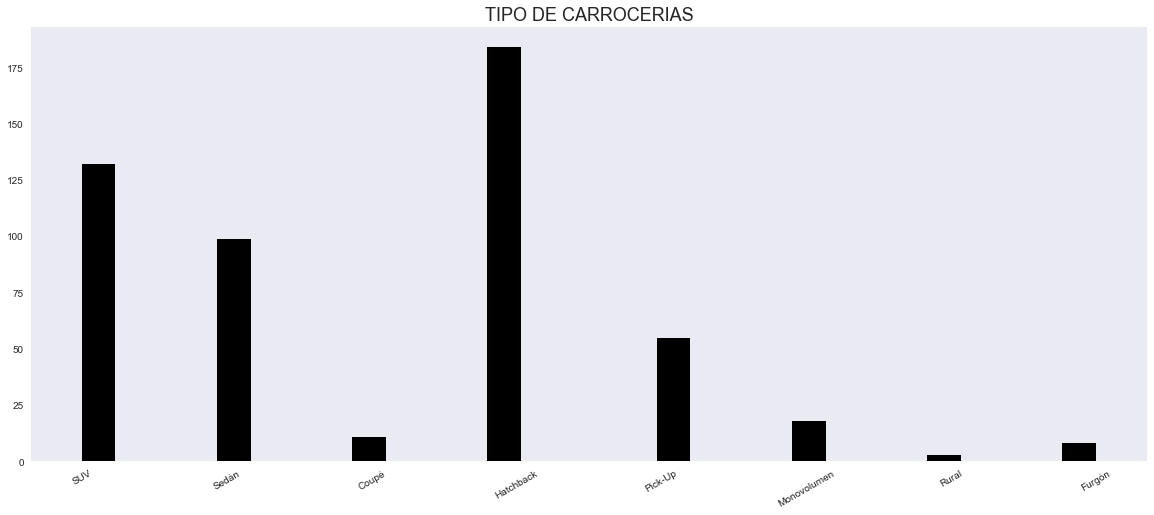

<Figure size 576x396 with 0 Axes>

In [18]:
df['Carroceria'].hist(bins=30, color='black') # Vemos graficamente su distribución
plt.title('TIPO DE CARROCERIAS', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 8)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [19]:
df.Color.value_counts()

Gris           169
Blanco         150
Negro           60
Plateado        53
Azul            25
Rojo            24
Dorado           8
Violeta          4
Marrón           4
Celeste          4
Gris oscuro      3
Naranja          3
Verde            2
Beige            1
Name: Color, dtype: int64

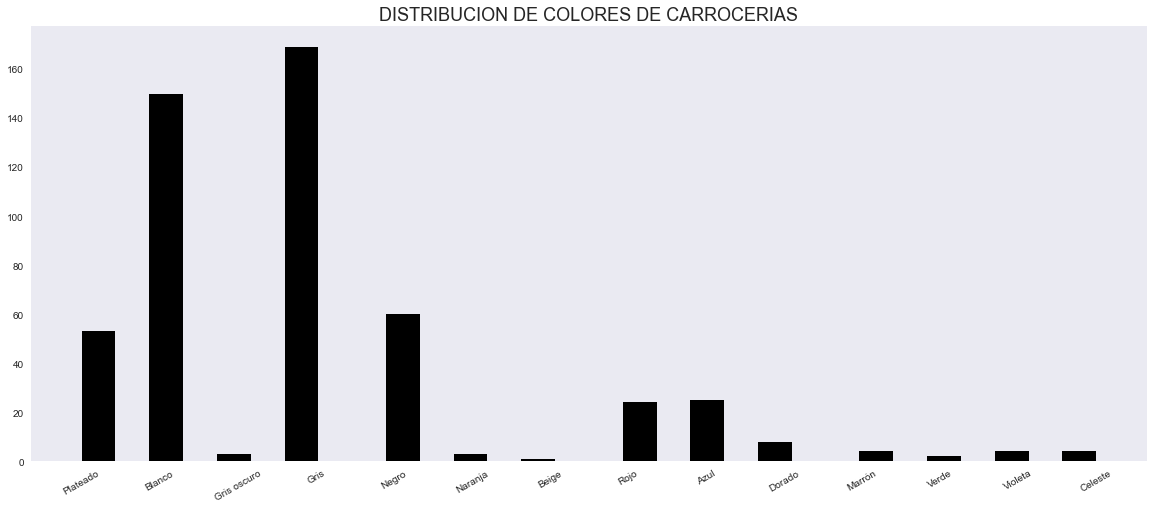

<Figure size 576x396 with 0 Axes>

In [20]:
df['Color'].hist(bins=30, color='black') # Vemos graficamente su distribución
plt.title('DISTRIBUCION DE COLORES DE CARROCERIAS', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 8)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [21]:
df.corr()

,Precio,Año,Puertas,Km
Precio,1.000000,0.428133,0.070264,-0.219567
Año,0.428133,1.000000,0.083977,-0.679453
Puertas,0.070264,0.083977,1.000000,-0.078398
Km,-0.219567,-0.679453,-0.078398,1.000000


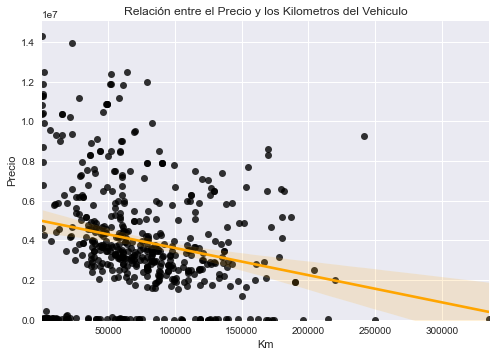

In [22]:
sns.regplot(x="Km", y="Precio", data=df, line_kws={"color": "orange"}, scatter_kws={"color": "black"})
plt.ylim(0,)
plt.title("Relación entre el Precio y los Kilometros del Vehiculo")
sns.set_style("whitegrid") # Fondo con cuadrícula

plt.savefig("argentina_cars.png")  #Aca guardo el grafico en una imagen para volver a usarlo sin modificaciones mas abajo
plt.show()

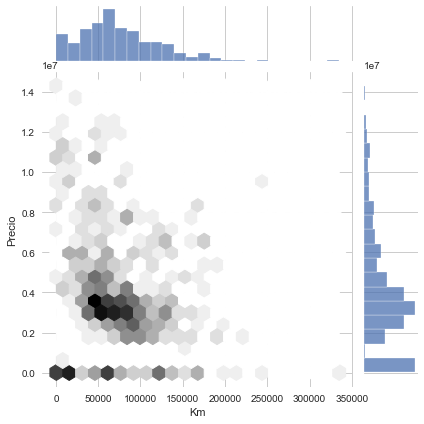

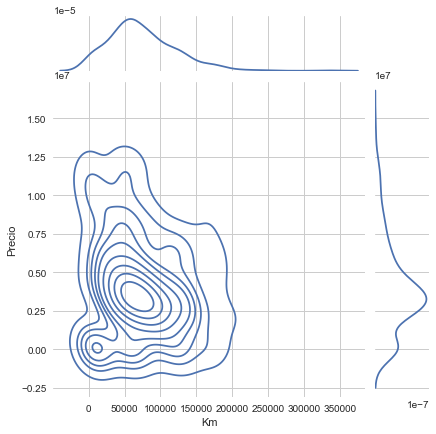

In [23]:
# Graficos para ver bien la relación entre 2 variables y al mismo tiempo mostrar la distribución de cada variable por separado.
sns.jointplot(x="Km", y="Precio", data=df, kind="hex", cmap="gist_yarg")
plt.show()

sns.jointplot(x="Km", y="Precio", data=df, kind="kde") # Crea un mapa de calor que indica donde se concentran mas los autos.
plt.show()


## <div style = 'background-color:black'> <center><font color='white'>③ Modelado y evaluación </font></div>
  
Aca intentare buscar el mejor modelo de regresión con el objetivo de predecir el precio de un automovil de acuerdo a sus caracteristicas, partiendo de lo mas simple a los algoritmos mas complejos.

Modelos posibles:

- Regresión Lineal
- Regresión Polinomica
- Gradient Boosting
- XGBoost

Se evalúan utilizando métricas como:

- Mean Scuared Error (Error cuadrático medio)

## ❑ Regresión Lineal

Si bien la relación entre los kilómetros recorridos y el precio del vehículo resulta evidente, a modo de demostración y práctica se realiza el cálculo de una regresión lineal considerando estas variables

In [24]:
# Regresión lineal
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [25]:
X = df[['Km']]
Y = df['Precio']

In [26]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [27]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([4983153.12497787, 4983153.12497787, 4983153.12497787,
       4982468.10030982, 4866698.93140833])

In [28]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra este valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  4990003.371658436 o lo que es lo mismo, cuando X=0, Y tendra este valor
Coeficiente:  [-13.70049336]


<div class="alert alert-warning">Sera una regresión lineal con la formula Y=a+bX, donde a=intercept y donde b=coef

Que seria como decir
Y = 4990003.37 - 13.9663xBeneficio/Acciones

Con esta formula podremos predecir el precio
</div>

In [29]:
# Pido predecir el modelo de regresión lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)


array([4983153.12497787, 4983153.12497787, 4983153.12497787,
       4982468.10030982, 4866698.93140833, 4846148.19136665,
       2852726.40732326, 2606117.52682305, 4085770.80982432,
       4510486.10401913, 4231078.24241239, 2769427.40768764,
       3467727.85381071, 3467727.85381071, 4513226.20269136,
       3606253.54218502, 3989867.35629646, 3852862.42268524,
       3633654.52890727, 2523914.56665631, 3893963.9027686 ,
       3551451.56874053, 3921364.88949085, 2660919.50026754,
       3291142.1948792 , 4154273.27662994, 4469384.62393577,
       2523914.56665631, 4236476.23679668, 3688456.50235176,
       2432121.26113679, 4702293.01107485, 3482949.10193492,
       4140572.78326882, 4058369.82310208, 3277441.70151807,
       4455684.13057464, 2976030.84757337, 4113171.79654657,
       3756958.96915738, 4674892.02435261, 3852862.42268524,
       3633654.52890727, 3962466.36957422, 4209075.25007443,
       3647355.02226839, 3825461.43596299, 4983016.12004426,
       4387181.66376903,

(0.0, 15070417.415119803)

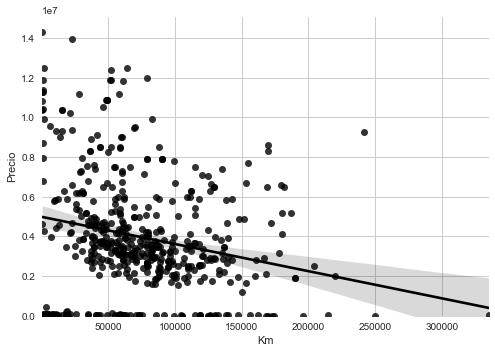

In [30]:
sns.regplot (x="Km", y="Precio", data=df, color="black")
plt.ylim (0, )

Luego se compara Yhat (los valores estimados por el modelo) con los valores reales para determinar qué tan bien se ajusta la regresión a los datos.

<div class="alert alert-warning">El Mean Squared Error (MSE) mide la diferencia promedio entre los valores reales y los valores predichos por el modelo.

Para cada observación, se calcula la diferencia entre el valor real y el valor estimado, y luego esa diferencia se eleva al cuadrado para eliminar los signos negativos y penalizar los errores grandes.

Por ejemplo, si el valor real es 150 y la predicción del modelo es 50, la diferencia es 
150 − 50 = 100. Al elevarla al cuadrado, obtenemos 100² = 10.000

Finalmente, se calcula el promedio de todos esos errores al cuadrado.

Cuanto menor sea el MSE, mejor se ajusta el modelo a los datos, ya que indica que las predicciones están más cerca de los valores reales.
</div>

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  8090860395338.652


<div class="alert alert-warning">El valor obtenido del MSE, 8.090.860.395.338,652, es extremadamente elevado. Esto indica que existe una gran discrepancia entre los valores reales de df['Precio'] y las predicciones generadas por el modelo (Yhat). En consecuencia, el modelo no logra un buen ajuste a los datos, presentando errores de predicción considerables.
</div>


---
**Interpretación del MSE:**

MSE alto

Indica que el modelo tiene un mal desempeño.

Los errores entre los valores reales y los predichos son muy grandes.

Esto puede deberse a:

- Un modelo que no se ajusta bien a los datos.

- Datos con mucha variabilidad o ruido.

- Variables independientes que no tienen una relación lineal con la variable dependiente.

MSE bajo

- Indica que el modelo tiene un buen desempeño.

- Los errores entre los valores reales y los predichos son pequeños.

---
Esto se debe en principio a que en los datos hay una columna que esta expresada en pesos y otra en dolares, asi que procedo
a modificar esta columna para expresar todo en una sola moneda, pasando a dolares todos los valores que no lo esten, utilizando
de modo arbitrario un tipo de cambio de $1200 por cada dolar, aproximadamente acorde a lo que en este momento cotiza en el pais.
---

In [33]:
# Como estan actualmente los datos
df.head(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [34]:
df.loc[df["Moneda"] == "pesos", "Precio"] = df["Precio"] / 1200 #Tomo solo los valores en pesos y los convierto a dolares
df.loc[df["Moneda"] == "pesos", "Moneda"] = "dólares" # Cambia el valor en la columna "Moneda" para reflejar que esta en dolares

In [35]:
# Ver el resultado, figura expresado en dolares pero con muchos decimales que dificulta ver y entender bien los valores
df.head(3) 


,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,8625.000000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,dólares
1,9041.666667,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500.000000,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [36]:
df["Precio"] = df["Precio"].round(0).astype(int) # Para eliminar los decimales

In [37]:
df.head(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,8625,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,dólares
1,9042,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [38]:
df.corr()

,Precio,Año,Puertas,Km
Precio,1.000000,0.145336,-0.290603,-0.224759
Año,0.145336,1.000000,0.083977,-0.679453
Puertas,-0.290603,0.083977,1.000000,-0.078398
Km,-0.224759,-0.679453,-0.078398,1.000000


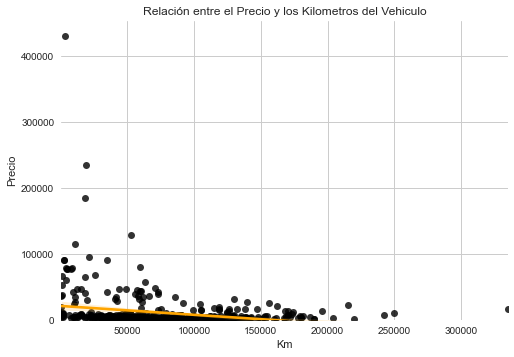

In [39]:
sns.regplot(x="Km", y="Precio", data=df, line_kws={"color": "orange"}, scatter_kws={"color": "black"})
plt.ylim(0,)
plt.title("Relación entre el Precio y los Kilometros del Vehiculo")
sns.set_style("whitegrid") # Fondo con cuadrícula

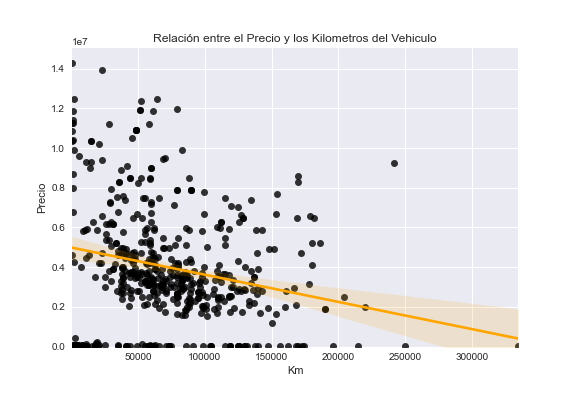

In [40]:
from IPython.display import display
from PIL import Image

# Cargar y mostrar la imagen guardada
img = Image.open("argentina_cars.png")
display(img)

Como puede observarse en los dos últimos gráficos, el primero presenta los valores ya normalizados y expresados en dólares, mientras que el segundo se incluye con el propósito de comparar la distribución de los datos antes del proceso de normalización.

In [41]:
# Regresión lineal (vuelvo a calcular con datos corregidos)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [42]:
X = df[['Km']]
Y = df['Precio']

In [43]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [44]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([20945.24071138, 20945.24071138, 20945.24071138, 20938.53694   ,
       19805.59957523])

In [45]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra ese valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  21012.278425276272 o lo que es lo mismo, cuando X=0, Y tendra ese valor
Coeficiente:  [-0.13407543]


In [46]:
# Pido predecir el modelo de regresión lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)

array([ 20945.24071138,  20945.24071138,  20945.24071138,  20938.53694   ,
        19805.59957523,  19604.48643356,     96.5116912 ,  -2316.84600889,
        12163.30019163,  16319.63845289,  13585.30417869,   -718.66690972,
         6115.02356893,   6115.02356893,  16346.45353844,   7470.66021924,
        11224.77219715,   9884.01791932,   7738.8110748 ,  -3121.29857558,
        10286.24420267,   6934.35850811,  10554.39505824,  -1780.54429776,
         4386.92538024,  12833.67733054,  15917.41216954,  -3121.29857558,
        13638.12989724,   8275.11278593,  -4019.60394173,  18196.69444184,
         6263.9813692 ,  12699.60190276,  11895.14933606,   4252.84995246,
        15783.33674176,   1303.19054124,  12431.45104719,   8945.48992485,
        17928.54358628,   9884.01791932,   7738.8110748 ,  10956.62134159,
        13369.97904167,   7872.88650259,   9615.86706376,  20943.89995711,
        15112.95960284,  13906.2807528 ,  13008.24353751,  12940.66952191,
        19671.52414745,  

In [47]:
# Ahora evaluo los resultados
from sklearn.metrics import mean_squared_error

In [48]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  737676895.8393358


<div class="alert alert-warning">Si bien el error cuadrático medio disminuyó tras la corrección, su valor sigue siendo considerablemente alto. Esto indica que el modelo continúa presentando un desempeño deficiente y no resulta adecuado para aplicarse a este conjunto de datos
</div>

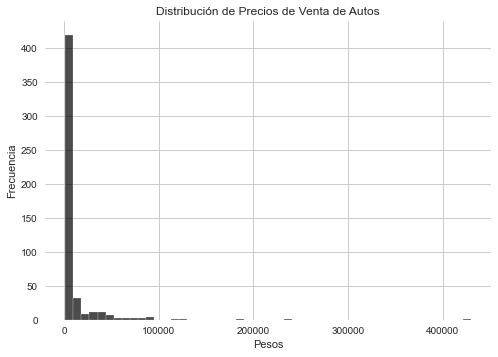

In [49]:
plt.hist(df['Precio'], bins=50, color='black', alpha=0.7)
plt.xlabel('Pesos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Venta de Autos')
plt.show()

In [50]:
df.head(100)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,8625,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,dólares
1,9042,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,1.6,SUV,550,dólares
4,4833,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,dólares
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4908,Toyota,Yaris,2021,Blanco,Nafta,5.0,Automática,1.5,Hatchback,19000,dólares
96,78500,RAM,1500,2022,Gris,Nafta,4.0,Automática,5.7,Pick-Up,8300,dólares
97,6292,Volkswagen,Nivus,2021,Blanco,Nafta,5.0,Automática,1.0,SUV,34000,dólares
98,2992,Renault,Sandero,2018,Gris,Nafta,5.0,Manual,1.6,Hatchback,57000,dólares


Como se puede observar en el ultimo grafico mostrado y en el dataframe arriba impreso, los precios de los autos con menor valor de venta son los que mas frecuentemente se negocian y que las ventas de autos mas caros son pocos en realidad y con precios muy altos.

Voy a intentar mejorar el modelo incluyendo una variable mas para ver si mejoran las mediciones y poder utilizarlo. En el caso de este set de datos, una variable que deberia estar muy correlacionada al precio serian el año de fabricacion.

In [51]:
X = df[['Km', "Año", "Puertas"]]
Y = df['Precio']

In [52]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [53]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([16095.43635927, 16095.43635927, 16095.43635927, 16088.08804019,
       26123.82394548])

In [54]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra ese valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  12574.996292883647 o lo que es lo mismo, cuando X=0, Y tendra ese valor
Coeficiente:  [-1.46966382e-01  2.98863639e+01 -1.13672609e+04]


In [55]:
# Pido predecir el modelo de regresión lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)

array([ 1.60954364e+04,  1.60954364e+04,  1.60954364e+04,  1.60880880e+04,
        2.61238239e+04,  1.46257725e+04, -6.99692690e+03,  1.54562097e+03,
        4.03916029e+04,  1.09354371e+04,  7.87843198e+03, -7.92036886e+03,
       -1.60662082e+02, -1.60662082e+02,  1.09947167e+04,  1.23638259e+04,
        5.35071460e+03,  3.76150533e+03,  1.38015685e+03, -1.06137792e+04,
        4.29206356e+03,  4.68472201e+02,  4.58599633e+03,  2.40246377e+03,
       -2.32388905e+03,  7.11431118e+03,  1.03451061e+04,  1.21805154e+04,
        1.94231431e+04,  1.33053969e+04, -1.15386812e+04,  2.44498865e+04,
       -3.26132435e+02,  6.90757207e+03,  5.99588741e+03, -2.56051452e+03,
        1.03475716e+04,  5.69303146e+03,  6.58375294e+03,  1.41000016e+04,
        1.27588064e+04,  3.76150533e+03,  2.40250196e+04,  4.99700911e+03,
        1.89498922e+04,  1.52712324e+03,  3.40779983e+03,  1.60939667e+04,
        9.49319421e+03,  8.26015587e+03,  1.86430360e+04,  7.20170399e+03,
        2.59768576e+04,  

In [56]:
# Ahora evalúo los resultados
from sklearn.metrics import mean_squared_error

In [57]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  663404475.7780166


<div class="alert alert-warning">Si bien se observa una mejora en el modelo, ésta no resulta suficiente como para considerarlo adecuado. Por ello, se procederá a revisar y tratar el conjunto de datos, analizando la posible influencia de valores atípicos (outliers) que podrían estar afectando los resultados del análisis.
</div>

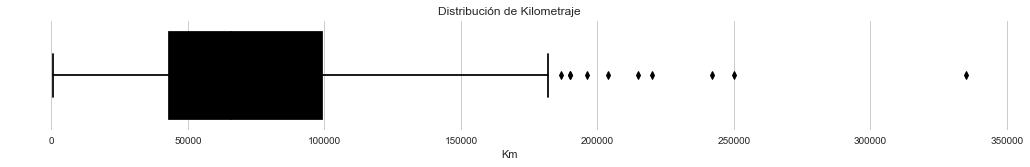

In [58]:
# Grafico para ver los outliers, son todos los puntos fuera del grafico (fuera del diagrama de caja)
plt.figure(figsize=(18, 2))  
sns.boxplot(x=df['Km'], color="black")
plt.title("Distribución de Kilometraje")
plt.show()

Para tratar los valores extremos en los datos sin eliminarlos, se aplica la técnica conocida como "Winsorization". Los outliers no se consideran errores, sino observaciones extremas que podrían influir en el modelo.

En la sentencia siguiente se establecen los límites mínimo y máximo permitidos para los datos de kilometraje (0 y 170.000 km), de manera que los valores fuera de este rango se ajusten a estos extremos.

In [59]:
df['Km'] = df['Km'].clip(lower=0, upper=170000)

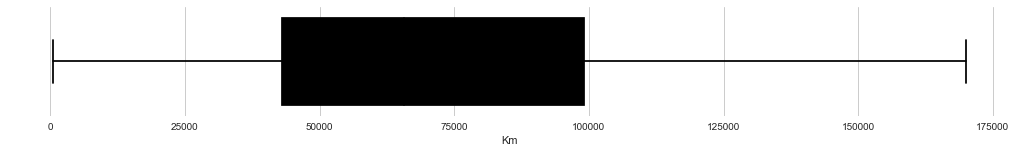

In [60]:
# Vuelvo a pasar la sentencia del grafico y se puede ver que ya no tiene outliers, pero a la vez no se borraron los datos.
plt.figure(figsize=(18, 2))  
sns.boxplot(x=df['Km'], color="black")
plt.show()

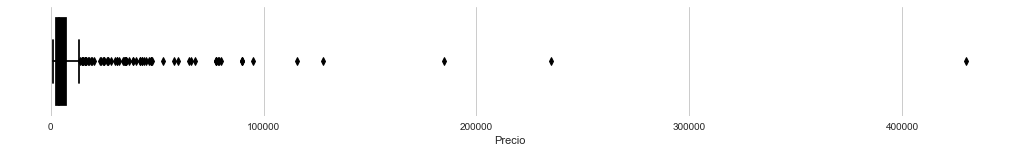

In [61]:
# Ahora con los valores de la columna "Precio". Acá también grafico para ver los outliers de la columna "Precios", estos son
# todos los puntos fuera del grafico (los que estan por fuera del diagrama de caja).
plt.figure(figsize=(18, 2))  
sns.boxplot(x=df['Precio'], color="black")
plt.show()

In [62]:
df['Precio'] = df['Precio'].clip(lower=0, upper=180000) # Establezco los limites para el precio

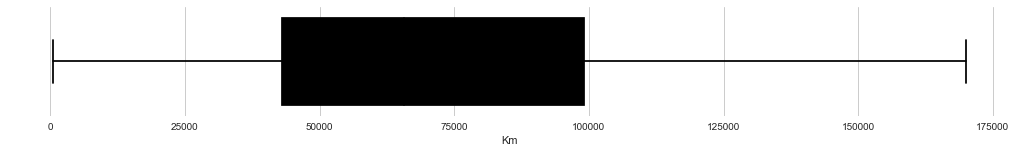

In [63]:
# Vuelvo a pasar la sentencia del grafico y se puede ver que ya no tiene outliers, pero a la vez no se borraron los datos.
plt.figure(figsize=(18, 2))  
sns.boxplot(x=df['Km'], color="Black")
plt.show()

Luego de trabajar con los outliers en los datos, se procede a seguir analizando

In [64]:
df.head(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,8625,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,dólares
1,9042,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [65]:
X = df[['Km', "Año", 'Puertas']]
Y = df['Precio']

In [66]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [67]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([16346.14228293, 16346.14228293, 16346.14228293, 16339.27869204,
       23450.21624862])

In [68]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra ese valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  -76716.43045134417 o lo que es lo mismo, cuando X=0, Y tendra ese valor
Coeficiente:  [-1.37271818e-01  6.70082864e+01 -8.47190928e+03]


In [69]:
# Pido predecir el modelo de regresión lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)

array([ 1.63461423e+04,  1.63461423e+04,  1.63461423e+04,  1.63392787e+04,
        2.34502162e+04,  1.49734241e+04, -5.53569166e+03,  6.12362444e+02,
        3.23685163e+04,  1.14092397e+04,  8.47570169e+03, -6.43731260e+03,
        1.16236925e+03,  1.16236925e+03,  1.15037024e+04,  1.02851427e+04,
        6.19291064e+03,  4.55215932e+03,  2.28880195e+03, -7.65852197e+03,
        5.16499963e+03,  1.39816275e+03,  5.43954326e+03,  1.21543702e+03,
       -1.21000178e+03,  7.84017245e+03,  1.06623828e+04,  9.41931315e+03,
        1.72697292e+04,  1.12427902e+04, -7.52450540e+03,  2.20039793e+04,
        5.77787092e+02,  7.56888406e+03,  6.67824487e+03, -1.54829846e+03,
        1.08601524e+04,  4.17166397e+03,  7.22733214e+03,  1.20631659e+04,
        1.31905181e+04,  4.55215932e+03,  1.90315956e+04,  5.78435043e+03,
        1.65931359e+04,  2.42607376e+03,  4.14359911e+03,  1.63447696e+04,
        9.90576021e+03,  8.87133871e+03,  1.64238013e+04,  7.88270708e+03,
        2.33129444e+04,  

In [70]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  367588770.76562


<div class="alert alert-warning">Tras corregir los outliers, el Mean Squared Error mejora significativamente; sin embargo, el valor aún no es lo suficientemente bajo. Por ello, se procederá a probar otro algoritmo con el fin de continuar el análisis del caso.</div>

## ❑ Regresión Polinomica

In [71]:
df.head(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,8625,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,dólares
1,9042,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Datos de ejemplo
X = df[['Km']]  # Variable independiente
y = df['Precio']    # Variable dependiente

# Convertir a polinomio de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Crear modelo de regresión lineal (aunque se use regresion lineal, al aplicarlo sobre X_poly se obtiene una polinómica)
modelo = LinearRegression()
modelo.fit(X_poly, y)

LinearRegression()

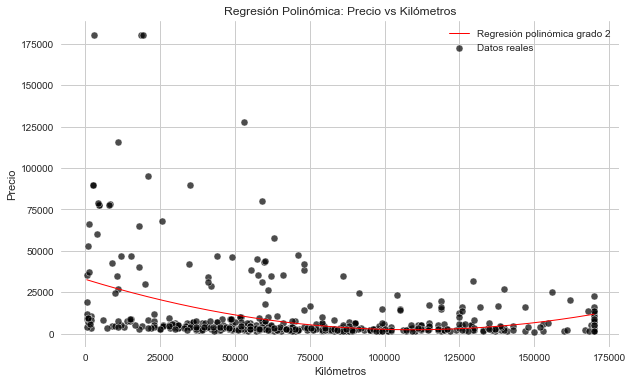

In [73]:
X_range = np.linspace(df['Km'].min(), df['Km'].max(), 500).reshape(-1, 1)
X_range_poly = poly.transform(X_range)  # Transformar a polinomio

# Predecir precios usando el modelo polinómico
y_pred = modelo.predict(X_range_poly)

# Graficar
plt.figure(figsize=(10,6))
sns.scatterplot(x='Km', y='Precio', data=df, color='black', alpha=0.7, label='Datos reales')
plt.plot(X_range, y_pred, color='red', linewidth=1, label='Regresión polinómica grado 2')
plt.xlabel('Kilómetros')
plt.ylabel('Precio')
plt.title('Regresión Polinómica: Precio vs Kilómetros')
plt.legend()
plt.show()

<div class="alert alert-warning">La curva intenta ajustarse a la tendencia de los datos, capturando posibles relaciones no lineales.

Por ejemplo, si los autos con pocos kilómetros tienen precios muy altos y luego bajan más rápido a medida que aumentan los kilómetros, la curva reflejará esa forma.</div>



In [74]:
from sklearn.metrics import mean_squared_error

# Predicciones
y_pred = modelo.predict(X_poly)

# Calcular el MSE
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 376884976.31882495


<div class="alert alert-warning">Aunque la curva polinómica pueda seguir mejor la tendencia de los datos, el error promedio sigue siendo elevado.

Esto significa que las predicciones se desvían significativamente de los valores reales de Precio.

Es un indicio de que el modelo actual no captura bien la relación entre Kilómetros y Precio con estos datos.</div>

In [75]:
# Busco estandarizar el df haciendo el precio una porcion de 1000 para ver como se comporta el resultado del MSE.
df["Precio"]=df["Precio"]/1000

In [76]:
df.head(3)

,Precio,Marca,Modelo,Año,Color,Combustible,Puertas,Transmision,Motor,Carroceria,Km,Moneda
0,8.625,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,1.6,SUV,500,dólares
1,9.042,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dólares
2,35.500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares


In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Datos de ejemplo
X = df[['Km']]  # Variable independiente
y = df['Precio']    # Variable dependiente

# Convertir a polinomio de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Crear modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_poly, y)

LinearRegression()

In [78]:
from sklearn.metrics import mean_squared_error

# Predicciones
y_pred = modelo.predict(X_poly)

# Calcular el MSE
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 376.88497631882484


In [79]:
df.mean()

Precio        10.424347
Año         2016.296078
Puertas        4.474510
Km         73286.174510
dtype: float64

<div class="alert alert-warning">
    
- MSE = 376.88 (Raiz cuadrada de MSE es 19.41 unidades) 
    
- Promedio = 10.42 (Precio)

Quiere decir que el modelo esta cometiendo un error promedio de 19.41 unidades, cuando el valor promedio real es solo 10.42 unidades. Significa en otras palabras que el modelo esta dando un error mas grande que usar el promedio directamente.
Procedo a utilizar otro algoritmo.</div>

## ❑ Gradient Boosting

Es un algoritmo de aprendizaje supervisado que se utiliza principalmente para regresión y clasificación. Combina muchos modelos simples (normalmente árboles de decisión pequeños, llamados weak learners) para formar un modelo mucho más preciso y robusto.
Se usa mucho cuando los modelos lineales o polinómicos no capturan bien la complejidad de los datos.

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [81]:
X = df[['Km']]
y = df['Precio']

In [82]:
# Con esto creo el modelo
gb_model = GradientBoostingRegressor(
    n_estimators=200,   # número de árboles de decisión usados
    learning_rate=0.1,  # tamaño del paso (cuanto corrige cada arbol al anterior, grande tiende a sobreajuste, paso pequeño avanza despacio con mas precisión)
    max_depth=3,        # profundidad máxima de cada árbol
    random_state=42
)

In [83]:
gb_model.fit(X, y) # Entreno el modelo

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [84]:
y_pred = gb_model.predict(X) # Predecir sobre los mismos datos

In [85]:
mse_gb = mean_squared_error(y, y_pred)
print(f"MSE Gradient Boosting: {mse_gb:.2f}")

MSE Gradient Boosting: 87.41


<div class="alert alert-warning">Los modelos anteriores (regresión lineal y polinómica) tenían MSE extremadamente alto, en este caso con Gradient Boosting se obtiene un MSE de 87.41 que representa una mejora enorme. Indica que las predicciones del modelo están mucho más cerca de los valores reales de Precio (Ver línea roja en el gráfico como se acerca a los valores reales) , tambien captura mejor la relación entre Kilómetros y Precio, incluso frente a outliers o relaciones no lineales que pueda tener el dataset.</div>

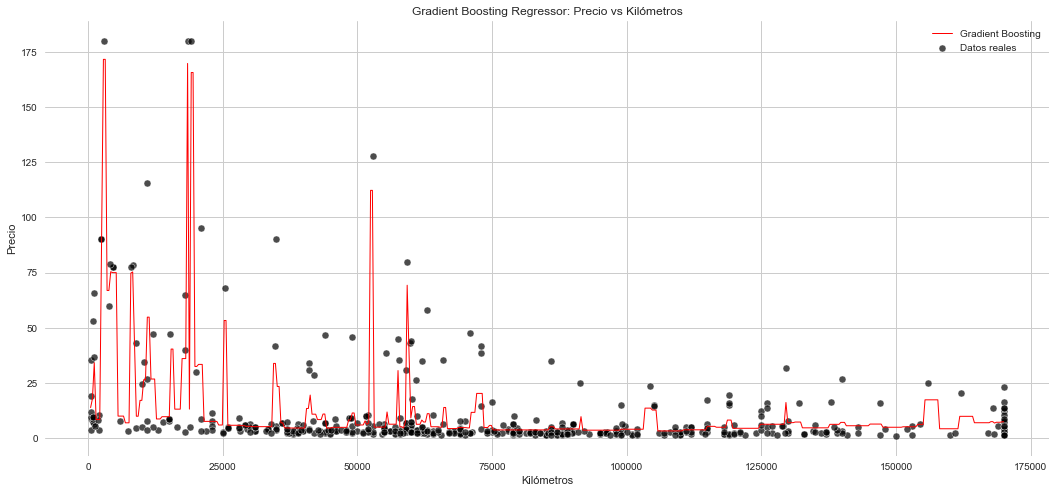

In [86]:
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1,1)
y_range_pred = gb_model.predict(X_range)

plt.figure(figsize=(18,8))
sns.scatterplot(x='Km', y='Precio', data=df, color='black', alpha=0.7, label='Datos reales')
plt.plot(X_range, y_range_pred, color='red', linewidth=1, label='Gradient Boosting')
plt.xlabel('Kilómetros')
plt.ylabel('Precio')
plt.title('Gradient Boosting Regressor: Precio vs Kilómetros')
plt.legend()
plt.show()

## ❑ XGBoost Regressor

Si bien el Gradient Boosting obtiene muy buenos resultados, se puede aplicar XGBoost Regressor que es una versión optimizada y 
más rápida de Gradient Boosting. Mantiene las ventajas de Gradient Boosting y añade mejoras importantes, que podría mejorar aún
más la precisión y la estabilidad del modelo. 

In [87]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
X = df[['Km']]
y = df['Precio']

In [ ]:
# Sentencia para crear el modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=300, # Numero de arboles
    learning_rate=0.5, # Tamaño del paso
    max_depth=4, # Profundidad del arbol de decisión
    random_state=42
)

In [ ]:
xgb_model.fit(X, y) # Entrenar el modelo

In [ ]:
y_pred_xgb = xgb_model.predict(X)

In [ ]:
mse_xgb = mean_squared_error(y, y_pred_xgb)
print(f"MSE XGBoost: {mse_xgb:.2f}")

<div class="alert alert-warning">Con los hiperparámetros iniciales, arroja un MSE ligeramente superior a Gradient Boosting (≈ 100.35), pero sigue siendo muy superior a los modelos lineales. Entonces planteo directamente un ajuste en los hiperparámetros (n_estimators=300, learning_rate=0.5, max_depth=4) y se obtiene un MSE ≈ 75.77, mejorando el desempeño.Más modificaciones de hiperparámetros no producen mejoras significativas, indicando que el modelo está cerca de su capacidad óptima de ajuste</div>




In [ ]:
X_range = np.linspace(df['Km'].min(), df['Km'].max(), 500).reshape(-1, 1)
y_pred_xgb_range = xgb_model.predict(X_range)

In [ ]:
plt.figure(figsize=(18,8))
sns.scatterplot(x='Km', y='Precio', data=df, color='black', alpha=0.7, label='Datos reales')
plt.plot(X_range, y_pred_xgb_range, color='red', linewidth=1, label='XGBoost')
plt.xlabel('Kilómetros')
plt.ylabel('Precio')
plt.title('XGBoost Regressor: Precio vs Kilómetros')
plt.legend()
plt.show()

## <div style = 'background-color:black'> <center><font color='white'>④ Conclusiones </font></div>
  
#### Entre los modelos evaluados —Árboles de decisión, Random Forest, K-Nearest Neighbors y Naive Bayes, EL de Random Forest se destacó por ofrecer la mejor precisión y un bajo ratio de errores, por lo que se recomienda utilizar este algoritmo para futuras predicciones, asegurando resultados confiables y consistentes para este conjunto de datos.

#### En cuanto a la importancia de los predictores, la variable “Income” (ingresos) resultó ser la más influyente, seguida a distancia por el nivel de educación de los clientes.

#### Recomendaciones para la entidad bancaria: Centrar los esfuerzos de análisis en determinar con precisión el nivel de ingresos de los clientes, ya que es el factor más determinante para la aceptación de préstamos. Considerar también el nivel de educación como segundo factor relevante.

#### Aplicando este enfoque, será posible optimizar la asignación de créditos, reduciendo la probabilidad de errores como falsos negativos y mejorando la eficiencia en la toma de decisiones crediticias.

In [ ]:
# Sentencia para poner los kilometros del auto que deseo predecir el precio
km_nuevo = np.array([[126000]])  

In [ ]:
precio_predicho = xgb_model.predict(km_nuevo)

In [ ]:
print(f"Precio estimado para un auto con {km_nuevo[0][0]} km: ${precio_predicho[0] * 1200:.2f}")
# Multiplicado por 1200 para representar el valor en pesos.

Estos resultados son teniendo en cuenta los campos Km y Precio, pero como ya tengo el modelo a utilizar, puedo plantear que
el algoritmo tenga en cuenta mas variables con lo que se va a obtener mejores respuestas.

In [ ]:
df.sample(2)

In [ ]:
df.dtypes

In [ ]:
df.Motor.value_counts()

In [ ]:
# En este caso hay 3 tipos de carroceria que voy a eliminar y agregar en otras mas representativas.
df.Motor = df.Motor.replace(["TURBO"], "1.6")
df.Motor = df.Motor.replace(["TOYOTA 2.8"], "2.8")
df.Motor = df.Motor.replace(["3.0 TD"], "3.0")
df.Motor = df.Motor.replace(["2.8tdi 223cv"], "2.8")
df.Motor = df.Motor.replace(["1.6 MSI Nafta"], "2.8")

In [ ]:
df.Motor.value_counts()

In [ ]:
print(df['Motor'].unique())
print(df['Motor'].dtype)

In [ ]:
X = df[['Km', 'Motor']] # Agrego mas campos (solo numéricos)
y = df['Precio']

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.5,
    max_depth=4,
    enable_categorical=True,  # 👈 clave
    random_state=42
)

In [ ]:
xgb_model.fit(X, y) # Entrenar el modelo